# EdTech industry Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like:

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the options of Pandas results
pd.set_option("display.max_columns", None) #Removes the limit for the number of displayed columns
pd.set_option("display.max_rows", 200) # Sets the limit for the number of displayed rows
pd.set_option("display.float_format", lambda x: f"{x:,.2f}") # To display float values in Pandas with 2 decimals only

# Importing ML modules from Sci-kit Learn:
# To re-scale the data using z-score
from sklearn.preprocessing import StandardScaler #(not sure if I will use it)
# To allocate the dataset into train and test subsets
from sklearn.model_selection import train_test_split
# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Algorithms to use for classification and decision trees:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the models
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score, f1_score
from sklearn import tree
from sklearn.tree import plot_tree

# For tuning the model
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

## Data Overview

- Observations
- Sanity checks

In [ ]:
data=pd.read_csv("EdTechData.csv")

In [ ]:
# Creating a backup of the DataFrame
data_bck=data.copy()

## Data Preprocessing

## Exploratory Data Analysis (EDA)

In [ ]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.06,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91,Email Activity,No,No,No,No,No,0


In [ ]:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.88,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.08,Phone Activity,No,No,No,No,No,0


In [ ]:
data.shape

(4612, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

Observations:

* There are no missing values in the dataset (4,612 rows across 15 variables), which simplifies preprocessing and ensures completeness in analysis.
* The dataset contains a mix of categorical (10 object columns), numerical (4 int64 columns), and floating-point (1 float64 column) data types.
Some categorical variables (e.g., current_occupation, first_interaction, last_activity, etc.) may need encoding for machine learning models.
* ID is likely a unique identifier and should not be used as a feature.
* time_spent_on_website, website_visits, and page_views_per_visit are continuous engagement metrics, which likely impact user behavior and conversion.
* profile_completed and first_interaction might be strong indicators of user engagement and intent.
* status (integer) is the target variable for prediction (0 = Not Converted, 1 = Converted), it will be better to have it codified as categorical.
* Categorical variables: Some columns (e.g., print_media_type1, digital_media, referral) may have binary "Yes"/"No" values that need conversion to numerical (0/1).



In [ ]:
# changing status and ocupation type of variable from integer to categorical:
data['status'] = data['status'].astype('category')
data['current_occupation'] = data['current_occupation'].astype('category')

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,"4,612.00",46.20,13.16,18.00,36.00,51.00,57.00,63.00
website_visits,"4,612.00",3.57,2.83,0.00,2.00,3.00,5.00,30.00
time_spent_on_website,"4,612.00",724.01,743.83,0.00,148.75,376.00,"1,336.75","2,537.00"
page_views_per_visit,"4,612.00",3.03,1.97,0.00,2.08,2.79,3.76,18.43


Observations:

Age: The average age is 46.2 years, with most leads between 36 and 57 years old. The minimum age is 18, and the maximum is 63.

Website Visits: Leads visit the website an average of 3.57 times, but this varies significantly (std = 2.83). Most leads have 2 to 5 visits, with some extreme cases reaching 30 visits.

Time Spent on Website: The average time spent is 724 seconds (12 minutes), but this varies widely (std = 743.83). While some leads spend almost no time, 75% of them spend up to 1,336 seconds (22 minutes), with a maximum of 2,537 seconds (42 minutes).

Page Views Per Visit: The average is 3.03 pages per visit, with most users viewing between 2.08 and 3.76 pages. Some users view up to 18.43 pages.

In [ ]:
data.describe(include=["category", "object"]).T

,count,unique,top,freq
ID,4612,4612,EXT001,1
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
print_media_type1,4612,2,No,4115
print_media_type2,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519


In [ ]:
data.nunique()

,0
ID,4612
age,46
current_occupation,3
first_interaction,2
profile_completed,3
website_visits,27
time_spent_on_website,1623
page_views_per_visit,2414
last_activity,3
print_media_type1,2


In [ ]:
# Dropping the ID variable for it will not be necessary for the analyses:
data=data.drop(columns=["ID"])

In [ ]:
# To double check if there are missing values:
data.isnull().sum()

,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0
print_media_type2,0


In [ ]:
# Selecting from the dataframe only the numerical variables:
num_cols=data.select_dtypes(include=['number']).columns.tolist()
print(num_cols)

['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']


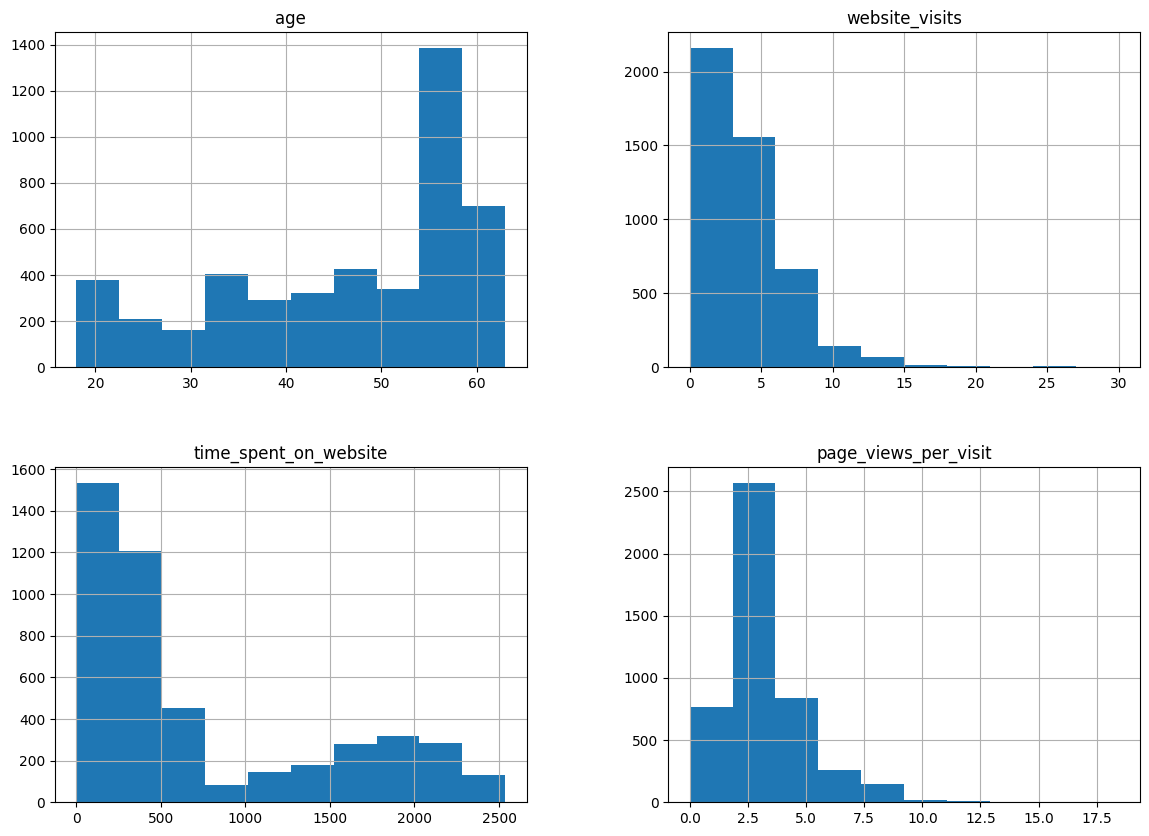

In [ ]:
# Creating histograms
data[num_cols].hist(figsize=(14,10))
plt.show()

In [ ]:
# Function to plot a boxplot and a histogram along the same scale
def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize)                   # Creating the 2 subplots

    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet") # Boxplot will be created and a Triangle will indicate the mean value of the column
    sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist2) # To create histogram
    ax_hist2.axvline(data[feature].mean(), color = "green", linestyle = "--")  # Adding mean to the histogram
    ax_hist2.axvline(data[feature].median(), color = "black", linestyle = "-") # Adding median to the histogram

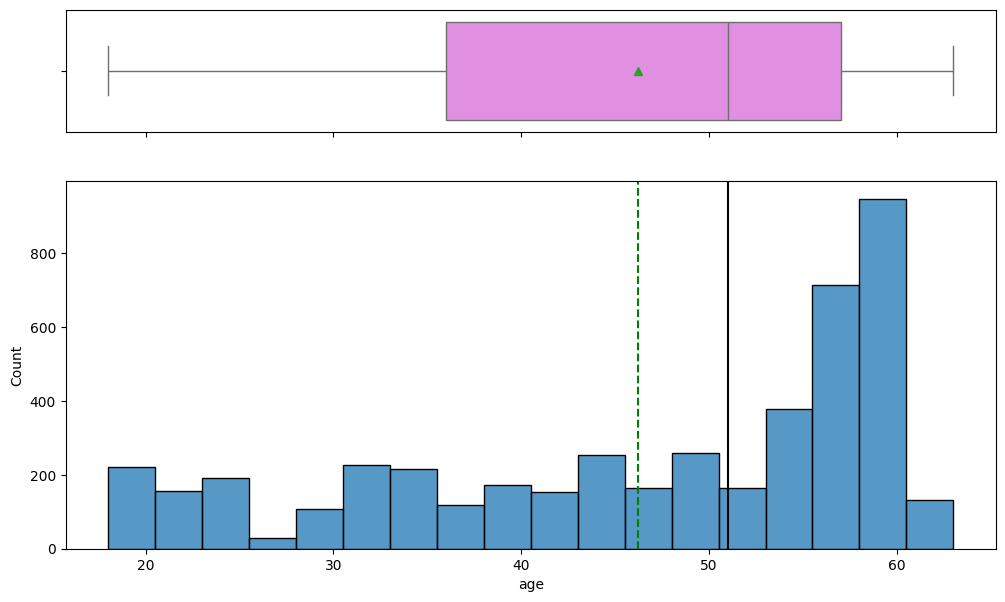

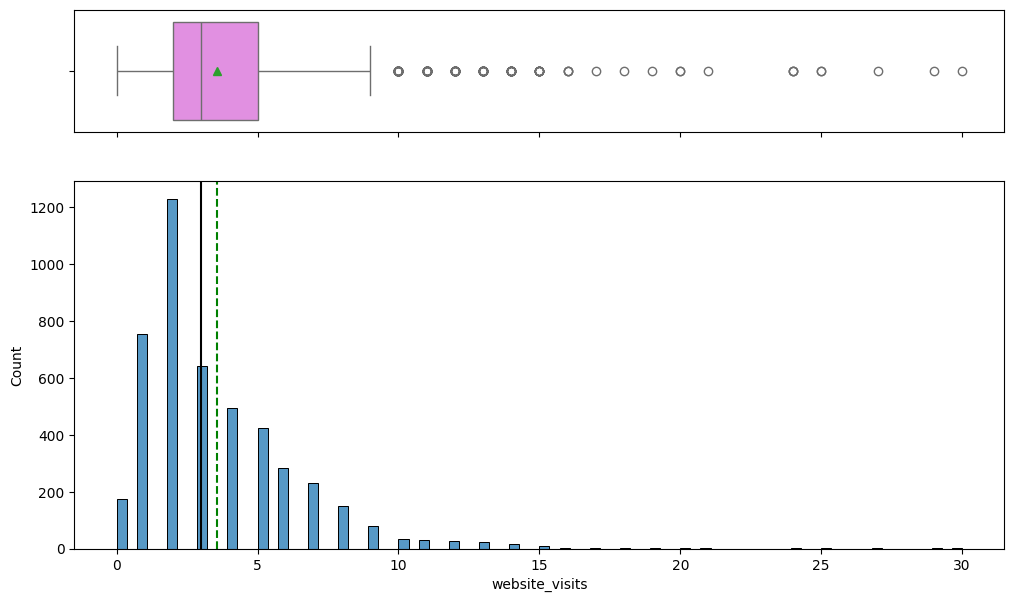

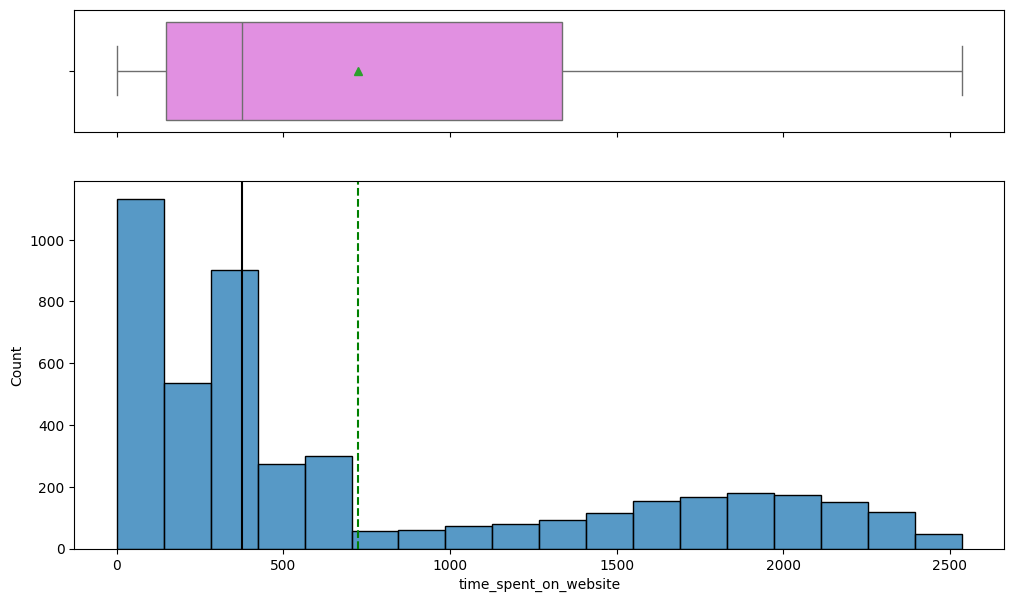

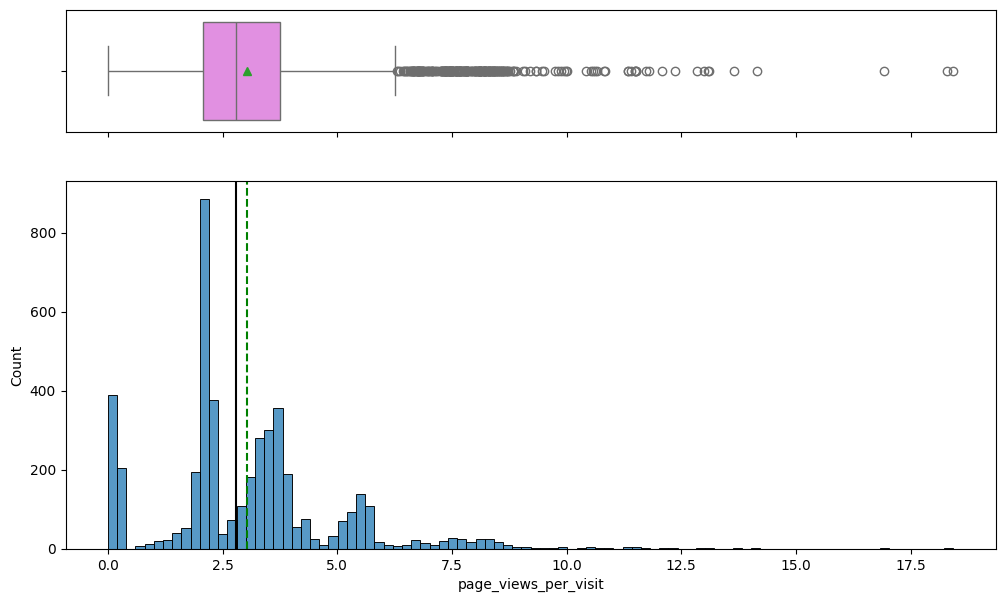

In [ ]:
# Plot histogram and box-plot
for num in num_cols:
  histogram_boxplot(data, num)

Observations:

The variables time_spent_on_website and website_visits area highly right-skewed and while some extreme values are visible in the variables —time_spent_on_website and website_visits— they appear to reflect genuine behavior rather than data errors. As a result, no special treatment like outlier removal or scaling will be applied.


Also, it is not necesary to scale because it will not make much of a difference in the performance of the Decision Tree model, since it is not a distance-based algorithm and rather tries to separate instances with splits in vector space.

<Axes: >

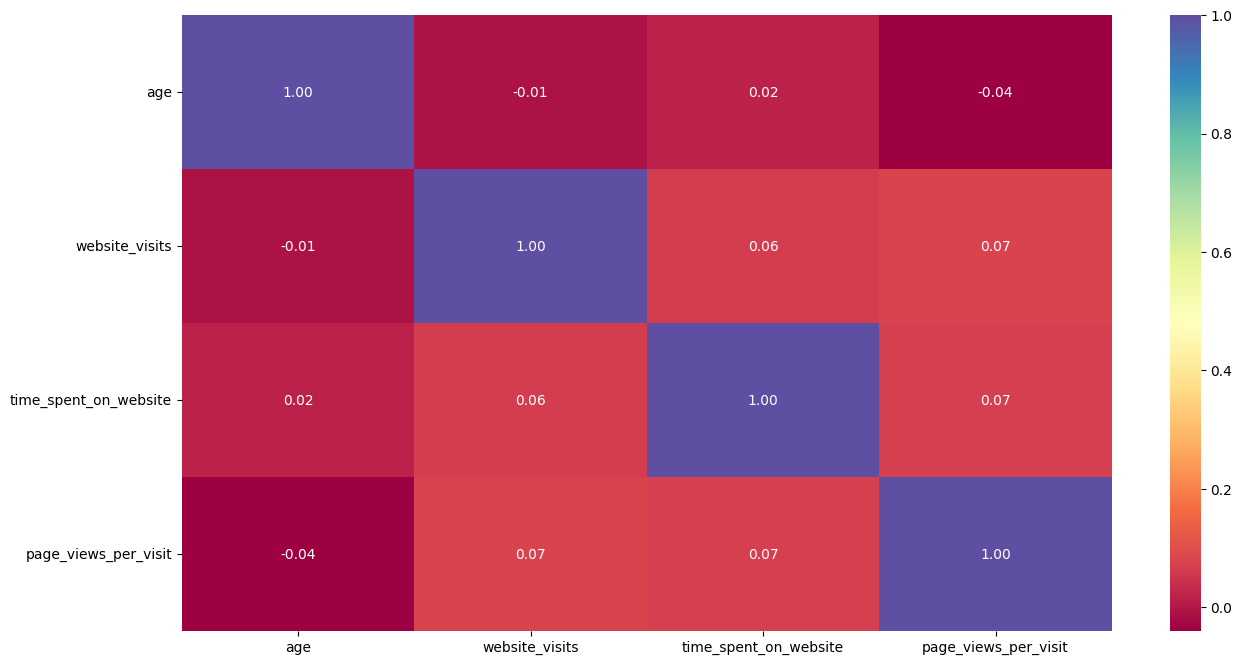

In [ ]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(data[num_cols].corr(),annot=True, fmt='0.2f', cmap='Spectral')

Observations:

The  matrix shows that there are no strong correlations among the selected features (age, website_visits, time_spent_on_website, and page_views_per_visit). The highest correlation values are around +0.07, indicating weak relationships between variables. age has almost no correlation with website_visits (-0.01), time_spent_on_website (0.02), and page_views_per_visit (-0.04), suggesting that user engagement on the website is not significantly influenced by age. Similarly, website_visits, time_spent_on_website, and page_views_per_visit are weakly correlated (0.06-0.07), meaning that more visits do not necessarily lead to more time spent or more pages viewed per visit.

In [ ]:
# Selecting from the dataframe only the categorical variables:
cat_cols=data.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_cols)

['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral', 'status']


In [ ]:
# Printing tables of the categorical variables:
for cat in cat_cols:
   print(data[cat].value_counts(1)*100)
   print("-"*35)

current_occupation
Professional   56.72
Unemployed     31.24
Student        12.03
Name: proportion, dtype: float64
-----------------------------------
first_interaction
Website      55.12
Mobile App   44.88
Name: proportion, dtype: float64
-----------------------------------
profile_completed
High     49.09
Medium   48.59
Low       2.32
Name: proportion, dtype: float64
-----------------------------------
last_activity
Email Activity     49.39
Phone Activity     26.76
Website Activity   23.85
Name: proportion, dtype: float64
-----------------------------------
print_media_type1
No    89.22
Yes   10.78
Name: proportion, dtype: float64
-----------------------------------
print_media_type2
No    94.95
Yes    5.05
Name: proportion, dtype: float64
-----------------------------------
digital_media
No    88.57
Yes   11.43
Name: proportion, dtype: float64
-----------------------------------
educational_channels
No    84.71
Yes   15.29
Name: proportion, dtype: float64
---------------------------

Observation:

A 56.7% of leads are professionals, while 31.2% are unemployed and only 12.0% are full time students. More than half of leads first interacted via the website (55.1%), compared to 44.9% using the mobile app.
A 49.1% of leads have high profile completion, 48.6% have medium, and 2.3% have low.
A 49.4% of leads engaged through email as their last activity, 26.8% via phone, and 23.9% through website interactions.

## Preparing data for training to predict the status: 1 if the lead was converted to a paid customer, 0 if not.

In [ ]:
X=data.drop(columns=["status"]) #sending all the independent variables into the dataframe to the X matrix, except the status variable because it will play as dependent variable to predict
y=data["status"]

In [ ]:
# Spliting the sample into train and test sub-samples:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

## Building a Decision Tree model

## Encoding categorical variables

In [ ]:
X_train=pd.get_dummies(X_train, drop_first=True)
X_test=pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)

(3689, 16) (923, 16)


In [ ]:
#I want the model to focus on Entropy to decide spliting points:
model_dt = DecisionTreeClassifier(criterion="entropy", random_state = 1) # so results can be replicated
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

Perfomance metrics of the Decision Tree

In [ ]:
# Defining a metric function to summarize
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8, 5))

    # Define darker colors: Dark green for correct, Dark red for incorrect
    colors = np.array([['#006400', '#8B0000'], ['#8B0000', '#006400']])  # Dark green & dark red in hex code (because I didn't like the green and red tones that came by default)
    labels = np.array([['True Negatives', 'False Positives'], ['False Negatives', 'True Positives']])  # Classification labels

    # Creating a heatmap without annotation
    ax = sns.heatmap(cm, annot=False, fmt='.2f',
                     xticklabels=['Not Converted\n(Free or dropped out)', 'Converted\n(Paid customer)'],
                     yticklabels=['Not Converted\n(Free or dropped out)', 'Converted\n(Paid customer)'],
                     cmap='coolwarm', cbar=False)  # Temporary colormap for structure

    # Manually overlaying colored rectangles and text
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            color = colors[i, j]  # Green for correct classification, red for incorrect
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=color, alpha=0.7))  # Colored background

            # Setting the text color to white for better contrast
            text_color = 'white'

            # Adding classification label (TP, TN, FP, FN) algonside with the count of cases
            ax.text(j + 0.5, i + 0.4, f"{cm[i, j]:.0f}", ha='center', va='center', fontsize=13, color=text_color, fontweight='bold')
            ax.text(j + 0.5, i + 0.7, f"({labels[i, j]})", ha='center', va='center', fontsize=10, color=text_color, fontweight='bold')

    # Adjusting x-axis and y-axis labels
    ax.set_xlabel('Predicted', labelpad=10, fontsize=12, fontweight='bold')
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()  # Moving x-axis ticks to the top
    plt.ylabel('Actual', fontsize=12, fontweight='bold')
    plt.show()

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       647
           1       0.64      0.66      0.65       276

    accuracy                           0.79       923
   macro avg       0.75      0.75      0.75       923
weighted avg       0.79      0.79      0.79       923



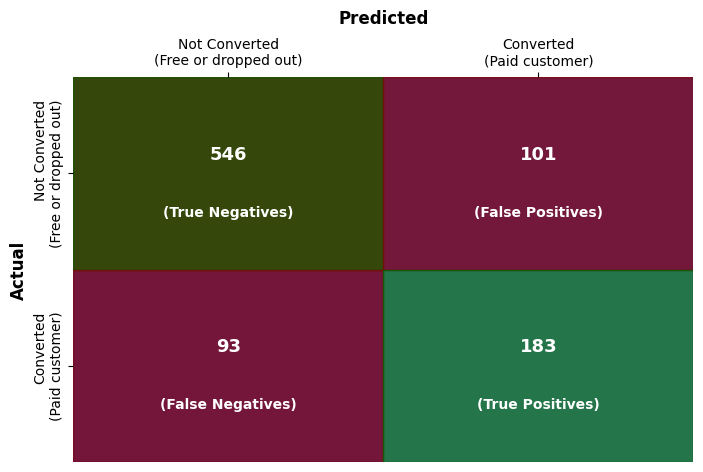

In [ ]:
# Creating a new variable that will contain the predictions of the model:
y_test_pred_dt = model_dt.predict(X_test)
# Using the defined function above to get the summary of the model perfomance metrics
metrics_score(y_test, y_test_pred_dt)

Observations
According to the calculated Confussion Matrix:
* True Negatives (Top-left): 546 cases were correctly classified as "Not Converted."
* False Positives (Top-right): 101 cases were wrongly classified as "Converted."
* False Negatives (Bottom-left): 93 cases were wrongly classified as "Not Converted."
* True Positives (Bottom-right): 183 cases were correctly classified as "Converted."

The model obtains an 79% accuracy, showing strong overall performance. It excels at identifying non-converting leads with a 84% recall but struggles with converting leads (class 1), achieving only a 66% recall. This means the model fails to capture approximately 34% of actual conversions.

In lead conversion prediction, recall for converted leads is critical because missing actual conversions (false negatives) leads to lost revenue opportunities. In a sales and marketing context, failing to identify potential conversions means losing customers who might have become paying users.

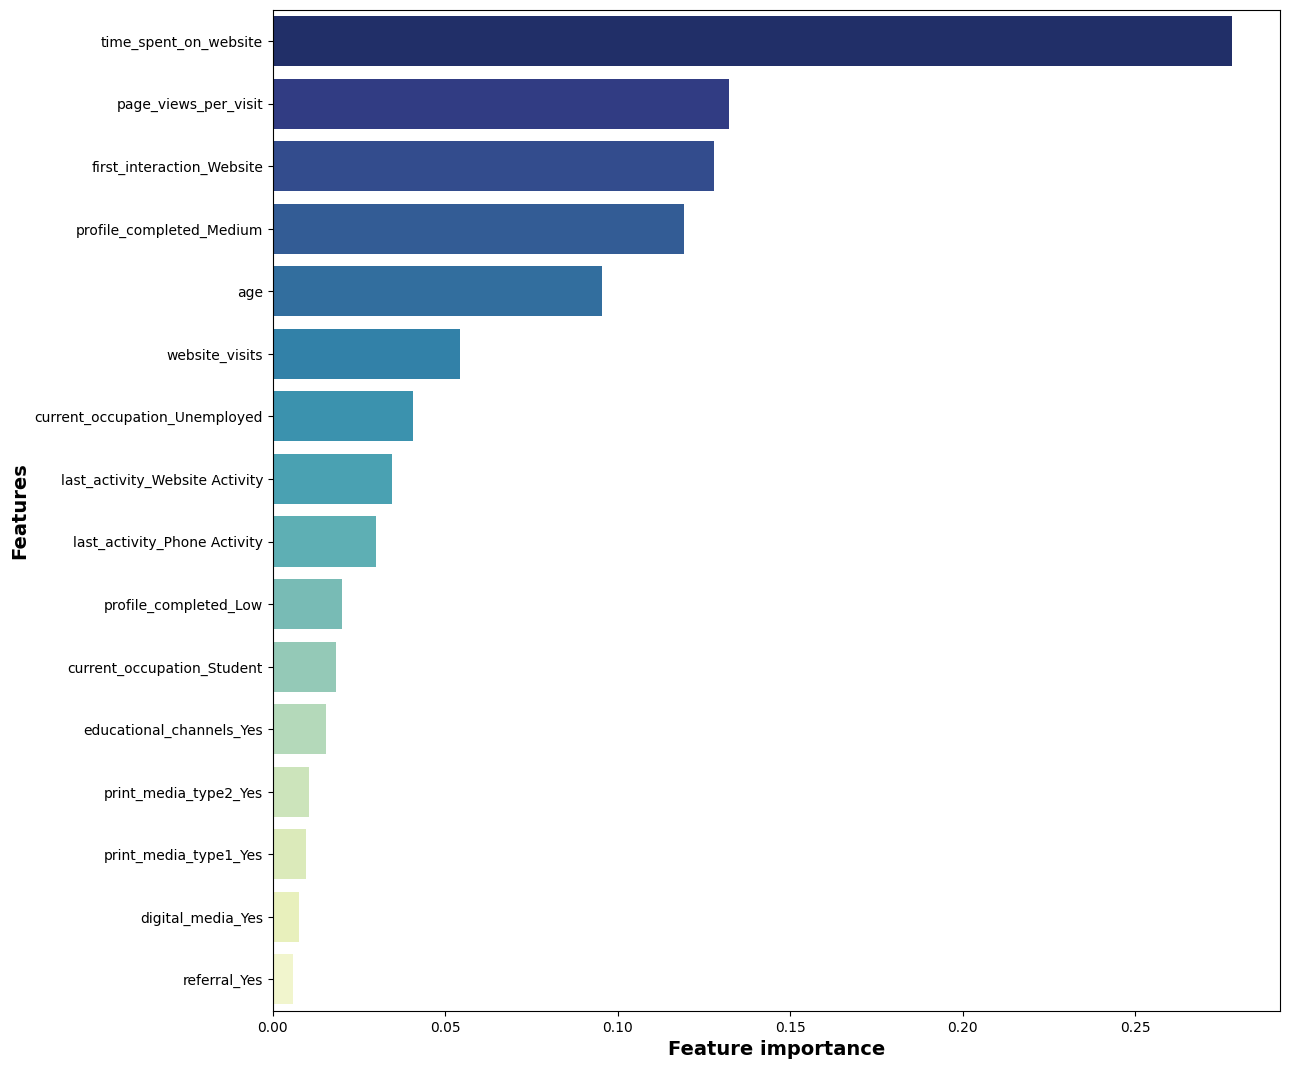

In [ ]:
# Defining importance
importances = model_dt.feature_importances_
columns = X_train.columns

# Creating a DataFrame for feature importance
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
num_features = len(importance_df)
colors = sns.color_palette("YlGnBu", num_features)[::-1]  # To reverse the color order from darker to lighter

# Creating the plot
plt.figure(figsize=(13, 13))
sns.barplot(data=importance_df, x="Importance", y=importance_df.index, palette=colors)

# Customizing labels
plt.xlabel("Feature importance", fontsize=14, fontweight="bold")
plt.ylabel("Features", fontsize=14, fontweight="bold")
plt.show()

Observations:

* time_spent_on_website has the highest importance, suggesting that the more time a user spends on the website, the more likely they are to convert to paid customers.
* page_views_per_visit and first_interaction_Website are also highly influential, indicating that user engagement metrics play a crucial role in the prediction.
* profile_completed_Medium and age contribute significantly, suggesting that older users or those with medium profile completion levels may behave differently.
* website_visits also has a noticeable effect, likely indicating that repeat visits influences the decision to move to suscribe to the premium plan.

Some lesser impact features:

* current_occupation_Unemployed and last_activity_Website Activity still contribute but are less impactful.
*Features like referral_Yes, digital_media_Yes, and print_media_type1_Yes have the lowest importance, meaning they contribute very little to the model's predictions.

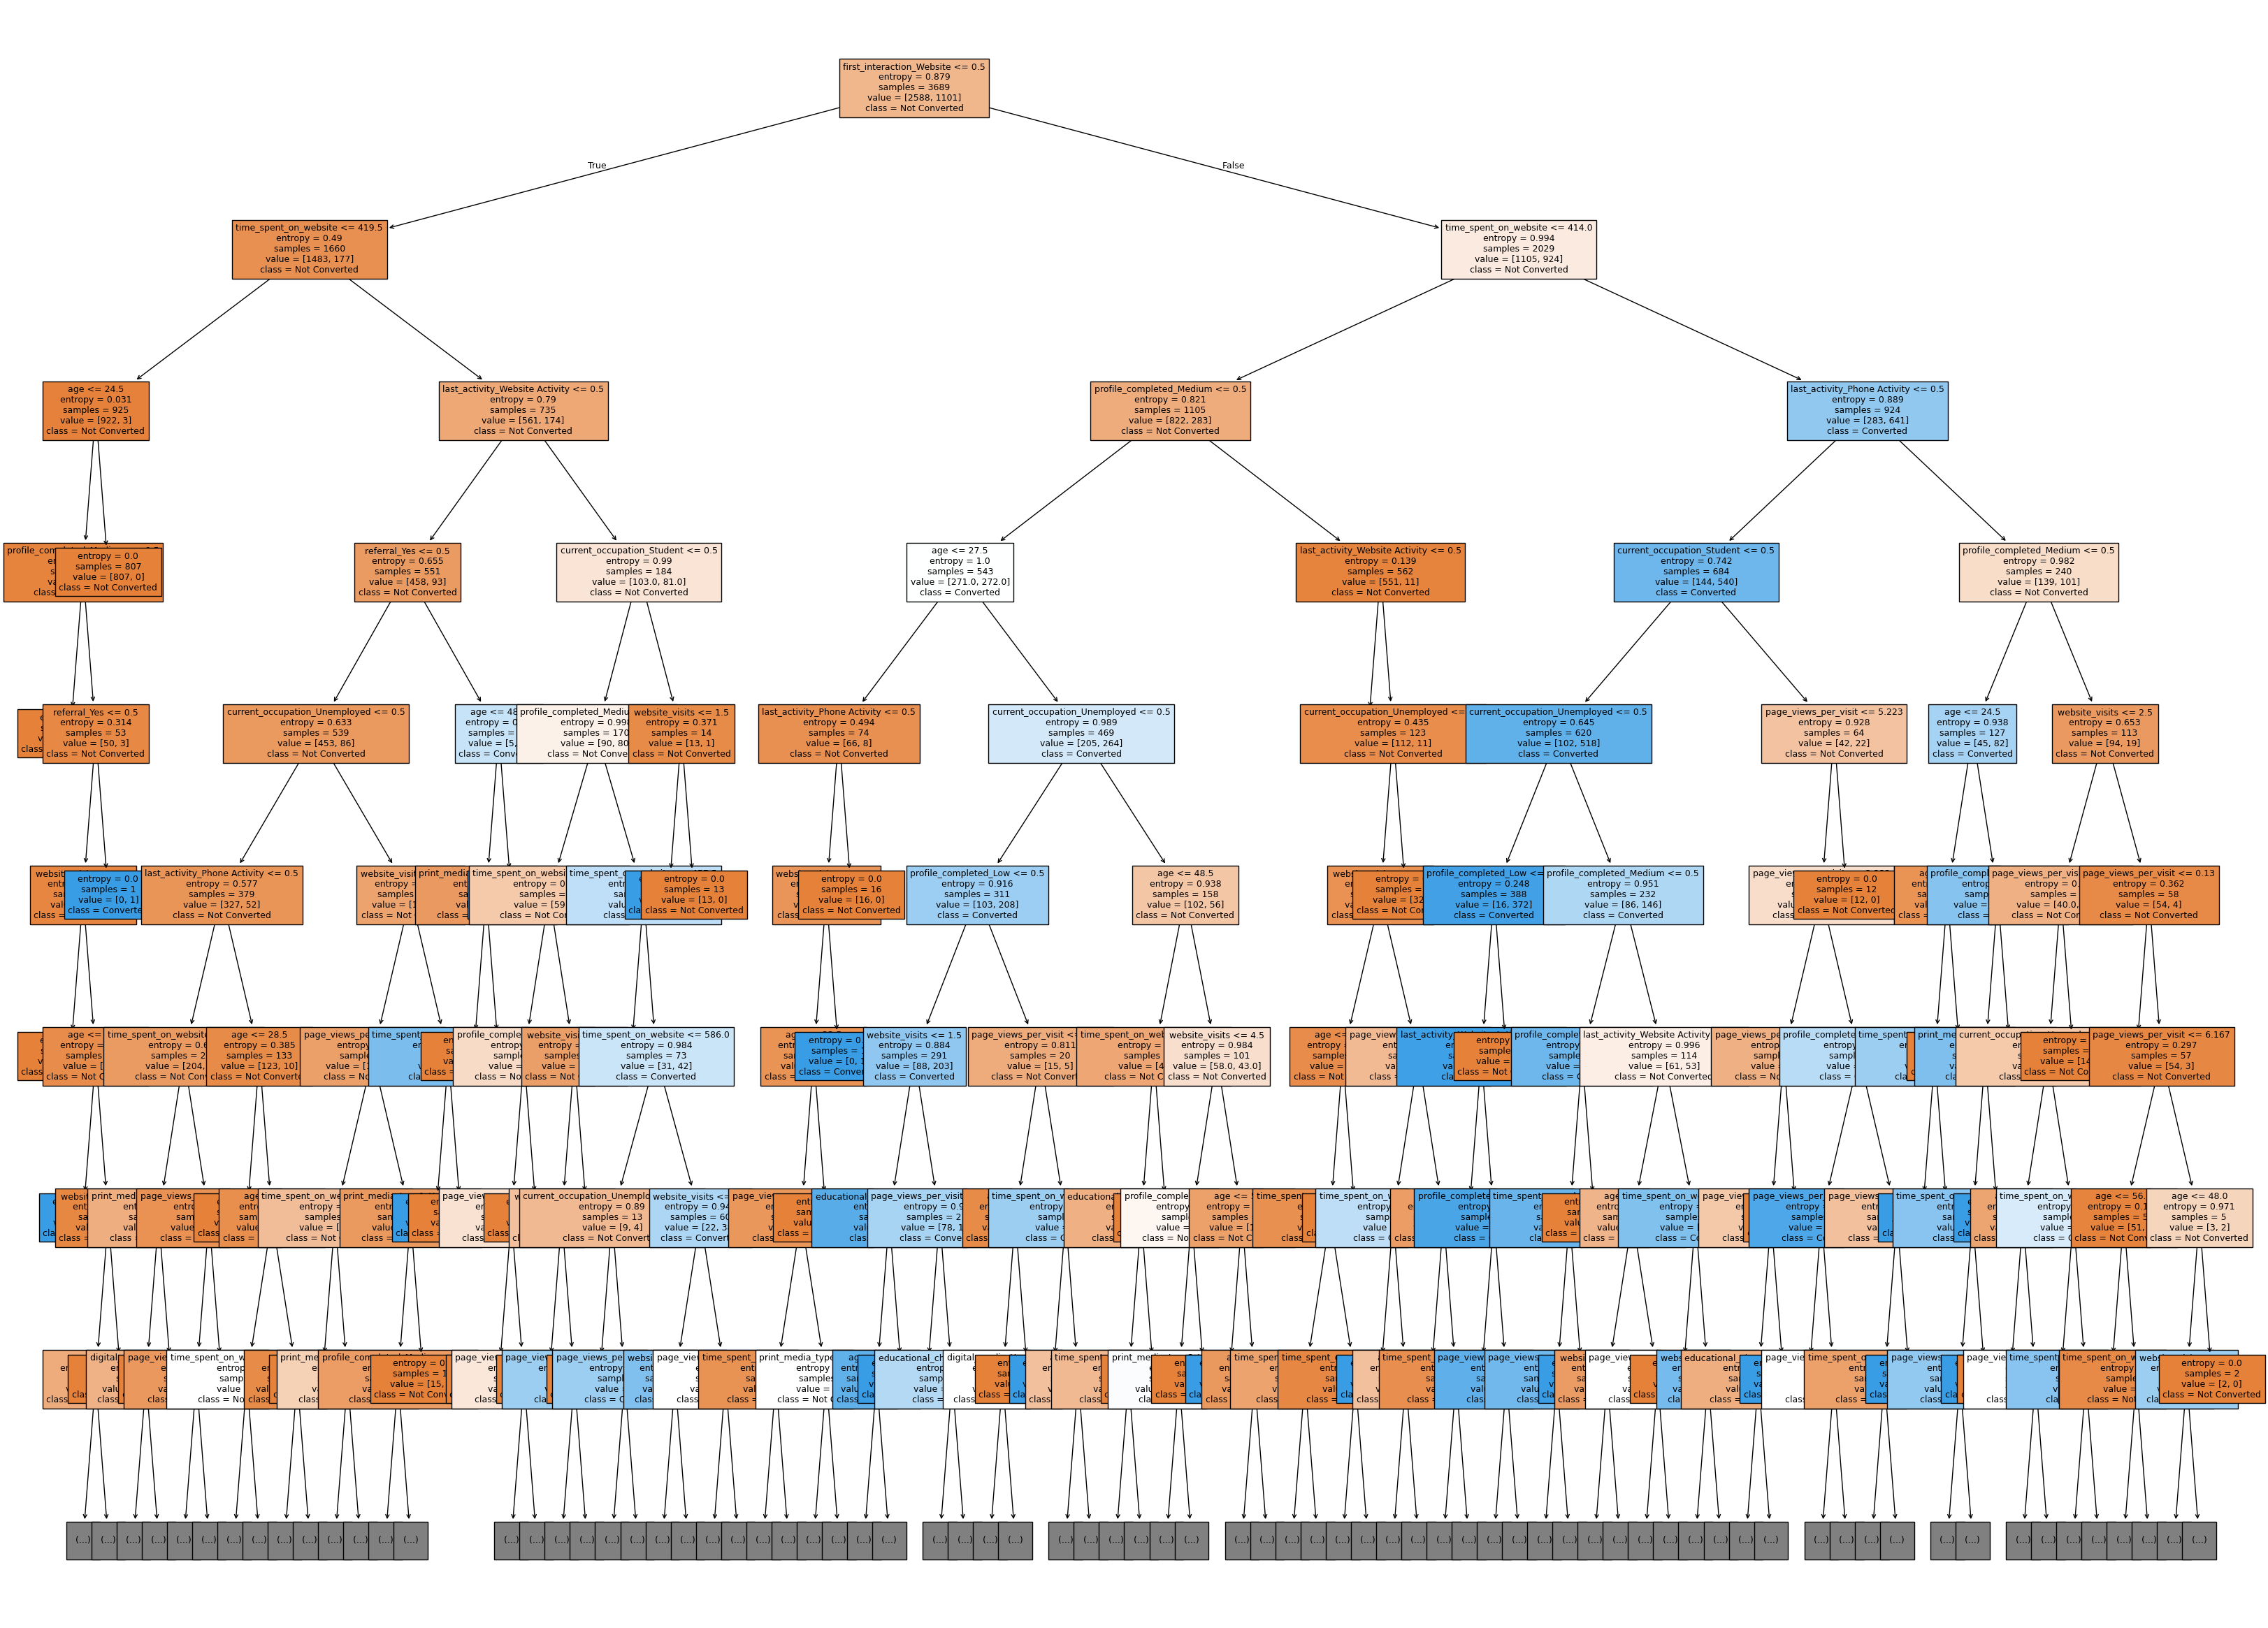

In [ ]:
from sklearn.tree import plot_tree
# Extract feature names
features = list(X_train.columns)

# Plot the decision tree
plt.figure(figsize=(40, 30))
# Plot the decision tree with specific settings:
# - model_dt: The trained DecisionTreeClassifier model
# - max_depth: Limits the depth of the tree to 8 levels to avoid overgrowing and keep it interpretable.
  #   If set to None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# - feature_names=features: Labels each node with the corresponding feature name
# - filled=True: Colors nodes based on class predictions for better readability
# - class_names=["Not Converted", "Converted"]`: Names the target classes (0 and 1)

plot_tree(model_dt, max_depth=8, feature_names=features, filled=True, fontsize=9, class_names=["Not Converted", "Converted"])
plt.show()

## Do we need to prune the tree?

Observations

This decision tree is overly complex and difficult to interpret, even with a predefined maximum depth of 8. The nodes are densely packed and overlapping, making it nearly impossible to clearly follow decision paths. Pruning is necessary for at least the following reasons:

  * Excessive tree depth: The tree has too many levels, increasing the risk of overfitting.
  * Overfitting risk: The model appears to be fitting the training data too closely, capturing noise rather than general patterns, which may lead to poor performance on unseen data.
  * Redundant splits: Many splits provide little reduction in entropy, meaning they add complexity without significantly improving classification accuracy.

Pruning will help simplify the tree, making it more interpretable and improving its generalization to new data. I will try a post-pruning like ccp_alpha to remove splits that contribute little to accuracy but add complexity.


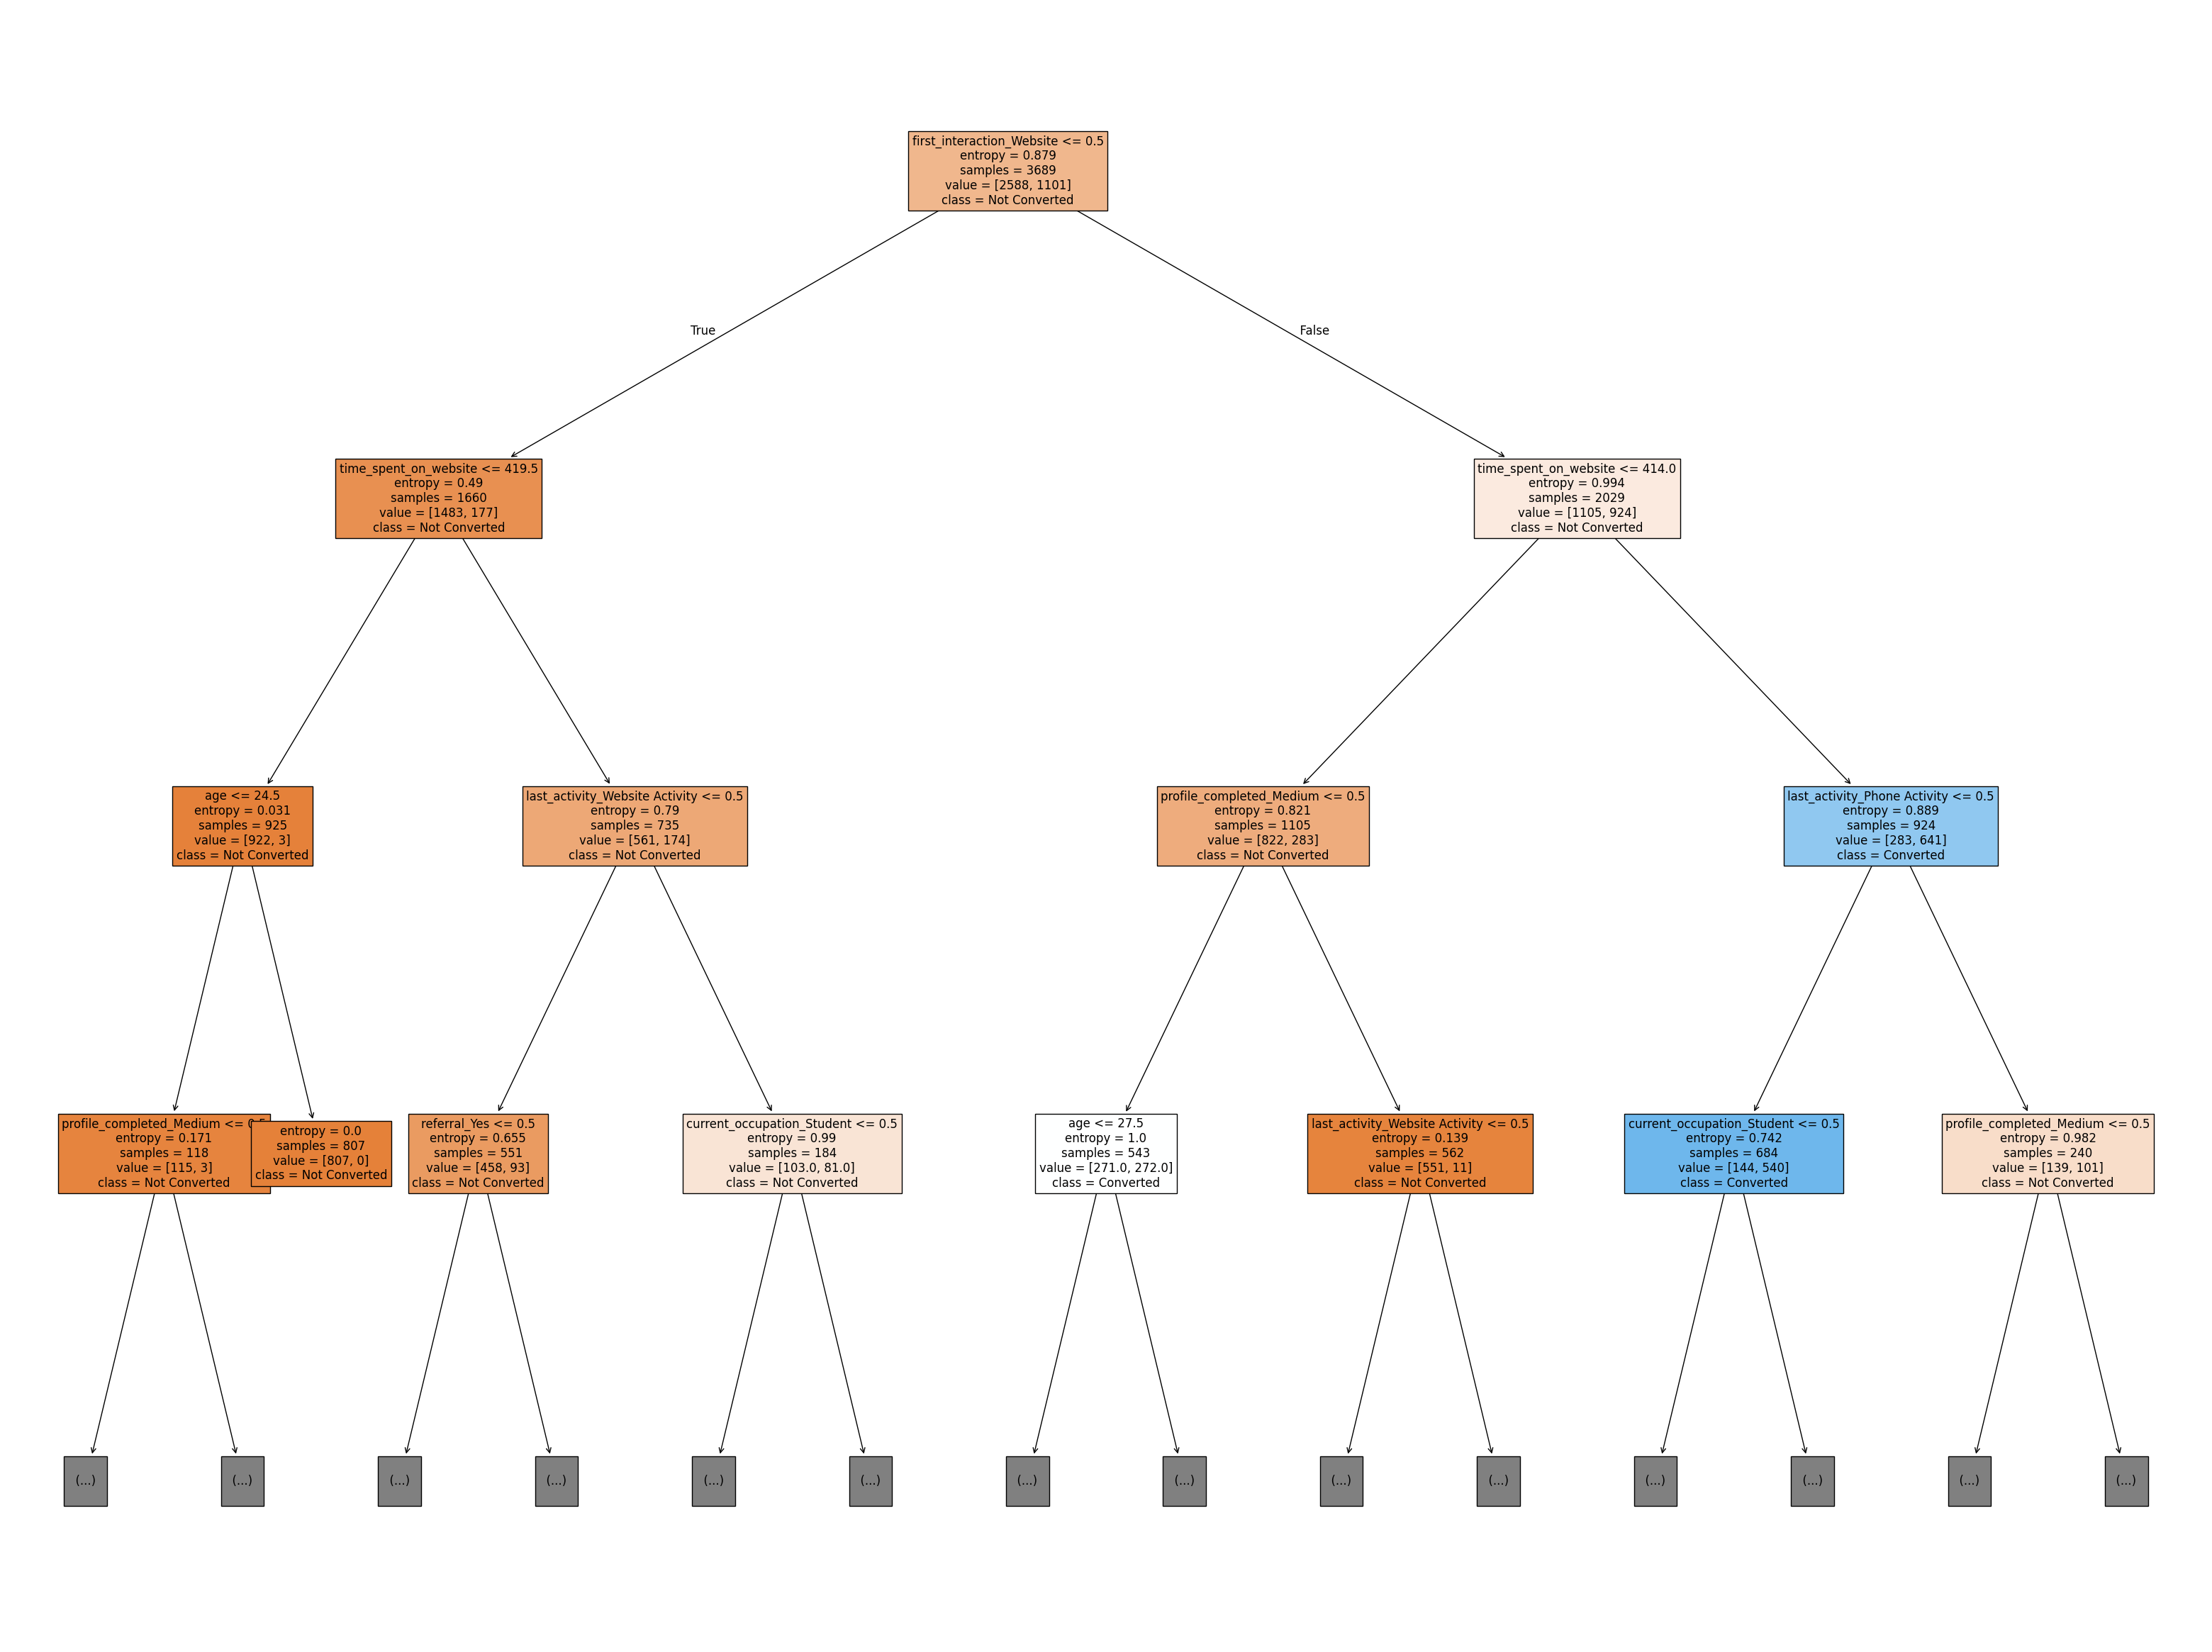

In [ ]:
# Finding the optimal ccp_alpha (Cost Complexity Pruning - Alpha)
path = model_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # Array of alpha values

# Selection of alpha to the smallest non-zero
optimal_alpha = ccp_alphas[np.argmax(ccp_alphas>0.001)]

# Training a new pruned decision tree
pruned_model_dt = DecisionTreeClassifier(criterion='entropy', ccp_alpha=optimal_alpha, random_state=1)
pruned_model_dt.fit(X_train, y_train)

# Plot the pruned tree
plt.figure(figsize=(40, 30))
plot_tree(pruned_model_dt, max_depth=3, feature_names=features, filled=True, fontsize=12, class_names=["Not Converted", "Converted"])
plt.savefig("pruned_decision_tree_300dpi.png", dpi=300) # I will export it to read it in a word document
plt.show()

**The pruned tree is more readable and shows that the most important split is based on whether the customer reached through the website or not**


If their first interaction occurs through the website, the decision tree guides us down to a totally different branch.

After that, the interaction with the website is still key: if their time spent navigating the web is greater than 414 seconds (6.9 minutes) they tend to conver. This shows that website engagement is a strong predictor of conversion.

Even more, if their last interaction did not ocurr over the phone, but through the website or e-mail and their occupation is not a full time student but professional or currently unemployed, the prediction is that the customer converted to a premium membership.



              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2588
           1       0.85      0.85      0.85      1101

    accuracy                           0.91      3689
   macro avg       0.89      0.89      0.89      3689
weighted avg       0.91      0.91      0.91      3689



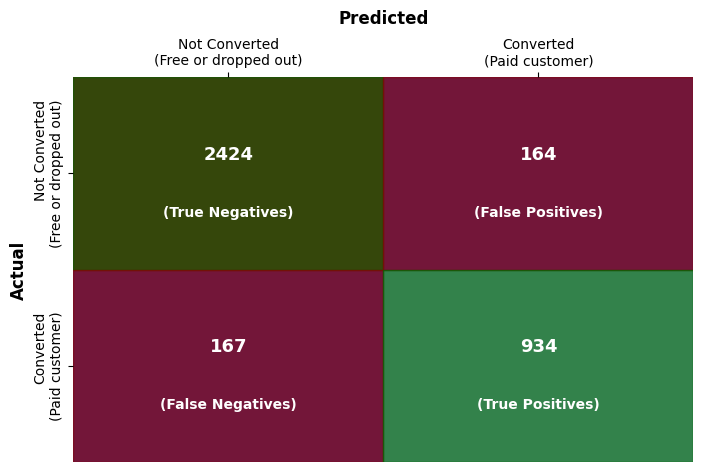

In [ ]:
## Running the model on the train dataset:
# Checking performance on the testing data
y_pred_train_dt_pruned = pruned_model_dt.predict(X_train)
metrics_score(y_train, y_pred_train_dt_pruned)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       647
           1       0.71      0.73      0.72       276

    accuracy                           0.83       923
   macro avg       0.80      0.80      0.80       923
weighted avg       0.83      0.83      0.83       923



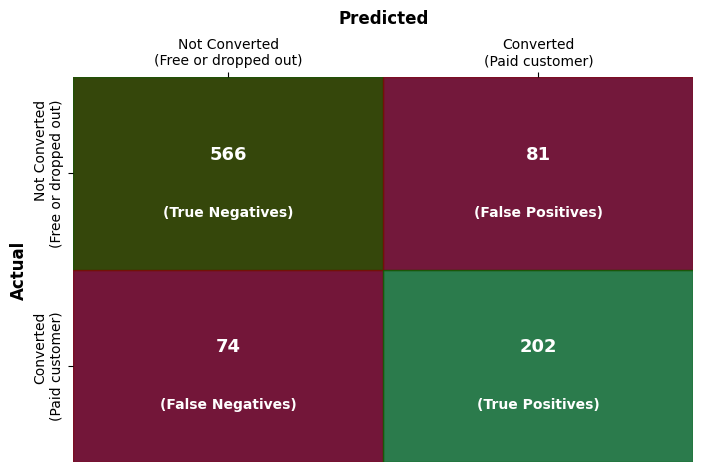

In [ ]:
## Running the model on the test dataset:
# Checking performance on the testing data
y_pred_test_dt_pruned = pruned_model_dt.predict(X_test)
metrics_score(y_test, y_pred_test_dt_pruned)

Observations:

On the training subset (using 80% of the data), the pruned model shows strong performance with an accuracy of 0.91. It correctly identifies 94% of class 0 instances and 85% of class 1 instances (Converted Customers), leading to a macro-average recall of 0.89.

However, on the test subset (20% of the data), the model's performance drops: accuracy falls to 0.83, class 0 recall decreases to 0.87, and class 1 recall drops to 0.73, resulting in a macro-average recall of 0.80. this difference suggests that while the model performs very well on the training data, it doesn't generalize as well to unseen data, particularly for class 1, indicating some overfitting that might need to be addressed.

In [ ]:
## Hyperparameter Tuning
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = 'balanced', random_state = 1) ¿

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 8),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=1)

## Performance after hyperparameter tunning

              precision    recall  f1-score   support

           0       0.95      0.75      0.83      2588
           1       0.60      0.90      0.72      1101

    accuracy                           0.79      3689
   macro avg       0.77      0.82      0.78      3689
weighted avg       0.84      0.79      0.80      3689



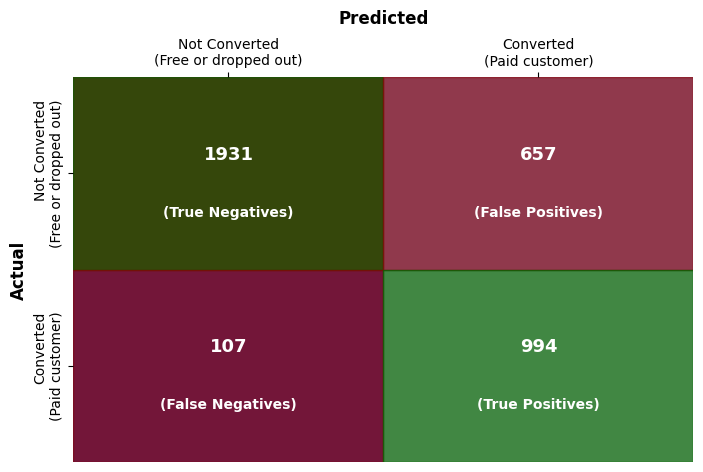

In [ ]:
# Checking performance on the training dataset after tunning
y_train_pred_dt_tuned = dtree_estimator.predict(X_train)
metrics_score(y_train, y_train_pred_dt_tuned)

              precision    recall  f1-score   support

           0       0.94      0.72      0.82       647
           1       0.58      0.89      0.70       276

    accuracy                           0.77       923
   macro avg       0.76      0.81      0.76       923
weighted avg       0.83      0.77      0.78       923



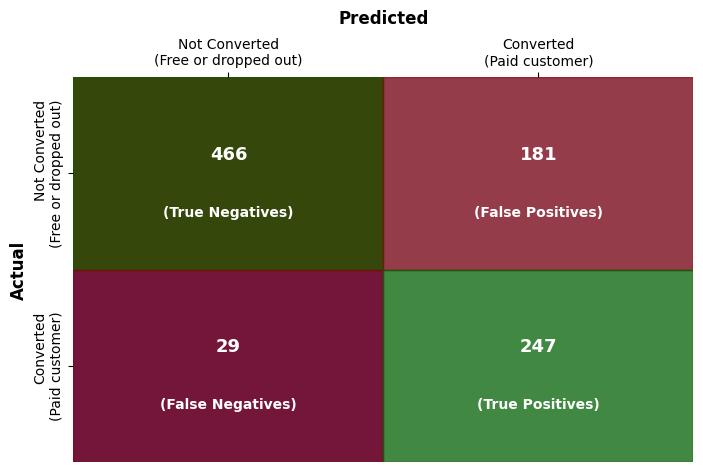

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt_tuned = dtree_estimator.predict(X_test)
metrics_score(y_test, y_test_pred_dt_tuned)

Observations:

After tuning, the pruned model’s performance becomes more balanced between the training and testing sets, both showing an accuracy of 0.79. However, this improvement in consistency comes with trade-offs: the tuned model’s recall for class 0 falls to 75%, while recall for class 1 increases significantly to 90%, leading to a macro recall of 0.82. Essentially, while the tuned model sacrifices overall accuracy and the ability to detect class 0 instances, it markedly improves the detection of class 1 (Conversion) cases and reduces overfitting by aligning training and testing performance.

In my view, this focus on capturing more conversion cases is more valuable to the business, because the primary goal is to increase revenue by converting free customers to paid subscribers.

## Building a Random Forest model

As a reminder to myself: Random Forest is a bagging algorithm where the base models are Decision Trees. Samples are taken from the training data and on each sample, a decision tree makes a prediction. The results from all the decision trees are combined and the final prediction is made using voting (for classification problems) or averaging (for regression problems).

In [ ]:
# Fitting the Random Forest classifier on the training data
model_rf = RandomForestClassifier(max_depth=8, random_state = 1)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=1)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2588
           1       0.85      0.80      0.82      1101

    accuracy                           0.90      3689
   macro avg       0.88      0.87      0.88      3689
weighted avg       0.90      0.90      0.90      3689



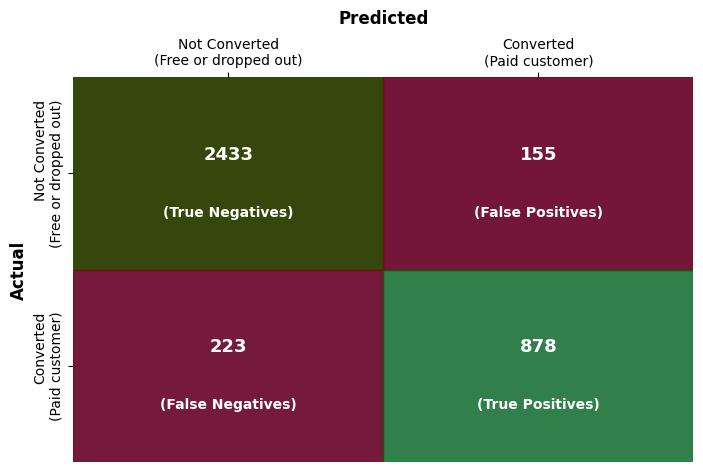

In [ ]:
# Checking performance on the training data
y_pred_train_rf = model_rf.predict(X_train)
metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       647
           1       0.81      0.72      0.76       276

    accuracy                           0.87       923
   macro avg       0.85      0.83      0.84       923
weighted avg       0.86      0.87      0.86       923



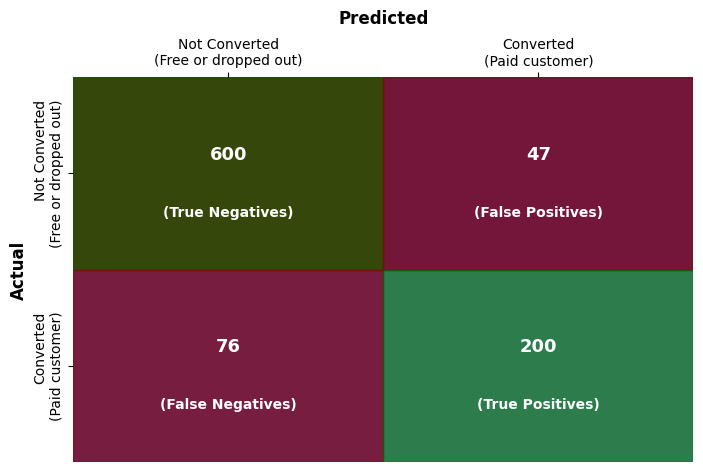

In [ ]:
y_pred_test_rf = model_rf.predict(X_test)
metrics_score(y_test, y_pred_test_rf)

Observations:

  The model prioritizes recall for conversions (class 1), meaning it's more likely to detect a converted user (high recall = 90%), but at the cost of misclassifying some non-converted users as converted.

  The high precision for class 0 (Not Converted) (95%) suggests the model is very confident when predicting a user will NOT convert.



## Tree complexity and fine-tunning

Since a Random Forest consists of multiple decision trees, plotting the entire forest is not practical. However, we can have control over trees complexity and reduce overfitting by adjusting hyperparameters that act as pruning mechanisms, through controling minimum samples for splitting or per Leaf, Cost Complexity Pruningm, would only work for individual trees

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight='balanced', random_state=1)

# Grid of parameters to choose from:
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features=0.7,
                       min_samples_leaf=3, n_estimators=250, random_state=1)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2588
           1       0.89      0.96      0.92      1101

    accuracy                           0.95      3689
   macro avg       0.94      0.95      0.94      3689
weighted avg       0.95      0.95      0.95      3689



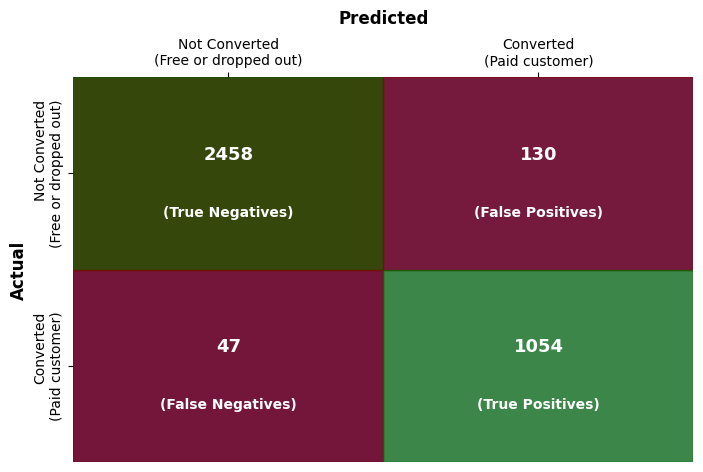

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       647
           1       0.74      0.79      0.76       276

    accuracy                           0.85       923
   macro avg       0.82      0.84      0.83       923
weighted avg       0.86      0.85      0.86       923



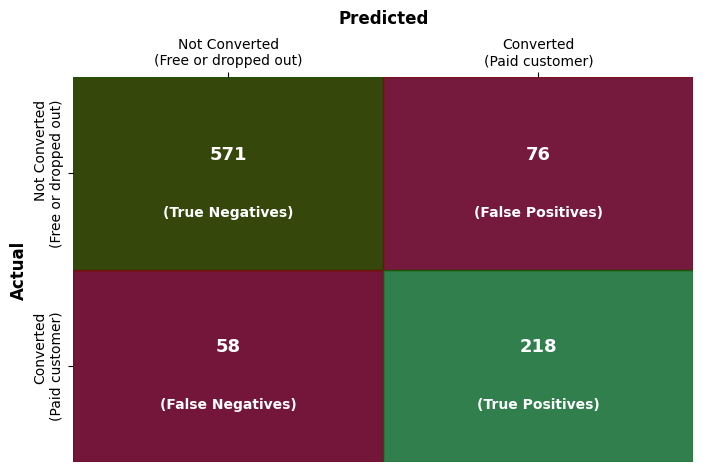

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_test_rf_tuned)

Observations:

The model performs exceptionally well on training data (95% accuracy) but drops to 85% on the test set.
Class 1 (Converted Users) experiences the biggest drop, meaning the model is less reliable in identifying actual conversions on unseen data.
The difference in precision and recall (up to 17% lower in test set) suggests overfitting, where the model has learned the training data patterns too well but struggles with new data.


## Conclusions:


1.	Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

* Current occupation appears to influence lead status. The EDA shows that a majority of leads are professionals, followed by unemployed individuals and then students. The decision tree indicates that when a lead’s occupation is not that of a full-time student and when combined with strong website engagement, the likelihood of conversion is higher. This suggests that professionals, who may be more motivated by career growth and upskilling opportunities, tend to convert at a higher rate than full time students.

2.	The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?

* The frist channel of interaction has a notable impact on lead status. The analysis reveals that leads who initially interact via the website tend to convert at a higher rate than those who start with any other channel. In fact, the decision trees use the first interaction channel as an important split, implying that a strong first impression through the website contributes significantly to driving conversion.

3.	The company uses multiple modes to interact with prospects. Which way of interaction works best?

* Among the multiple modes of interaction, digital interactions seem to work best. Especifically, the model shows that leads whose last activity was through email or website channels are more likely to convert compared to those whose last activity was via phone. This suggests that less intrusive, more informative digital communications provide a better platform for engagement, ultimately leading to higher conversion rates.

4.	The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

* When comparing importance of channels like print media and referrals they rank low. This leads to little appearance in the decision trees as deciding factors, unlike digital media. Overall, the feature importance and decision trees suggest that website interactions are far more influential. This implies that focusing efforts on channels that drive website engagement, along with optimizing referrals, may yield better conversion outcomes than relying heavily on traditional media channels.

5.	People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information. Does having more details about a prospect increase the chances of conversion?

* People who invest time in filling out their profile might simply be more interested or engaged, which could explain the correlation without proving a causal relationship. More research, such as controlled experiments or deeper statistical analysis, would be needed to determine if a more detailed profile causes an increase in conversion rates.


## Actionable Insights and Recommendations


1.	Lead engagement and conversion optimization
* Increase website engagement time: Leads who spend over 414 seconds (6.9 minutes) on the website are more likely to convert. Enhancing content, adding interactive elements, or offering free trials may boost engagement.
* Leverage website interactions: Leads who interact with representatives on the website have a higher conversion rate. Enhancing live chat, AI chatbots, and personalized responses can improve engagement.
<br><br>
2.	Improve targeting and lead qualification
* Focus on professional leads: 56.7% of leads are professionals, and they have a higher likelihood of converting. Tailoring messaging for professionals, such as career growth opportunities, could improve conversion rates. Also focus on unemployed who are likely professionals hunting their next position and who have the time to go through some training to updated their skillset.
* Reevaluate print & digital ads: Print media ads (newspapers/magazines) and digital ads contribute very little to conversion. Budget allocations should focus on website-driven conversions and referrals instead.
<br><br>
3.	Optimize sales and follow-up strategy
* Prioritize high-engagement users: Leads with multiple website visits and higher page views per session should be targeted first for follow-ups. A lead scoring model can automate prioritization.
* Optimize first interactions: Leads whose first interaction was via the website convert more than mobile app users. Consider improving onboarding for mobile users to match website performance.
<br><br>
4. Enhance continuous monitoring and iterative improvements

* Regularly review performance metrics: Establish a routine to monitor key engagement and conversion metrics to quickly identify any shifts in behavior or trends.
* Since website plays a major role in conversion, implment experiments: Implement randomized controlled experiments such as A/B tests on website design, content, and onboarding flows to determine which changes have the most significant positive impact on conversion rates.
* Solicit customer feedback: Engage with both converted and non-converted leads to gather qualitative insights that can inform further refinements in messaging, user experience, and follow-up strategies.